In [4]:
import numpy as np 
import pandas as pd 
!pip install category_encoders

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-shop-data-set/Customer-Churn-Prediction.csv


In [5]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [6]:
path = '/kaggle/input/customer-shop-data-set/Customer-Churn-Prediction.csv'
df = pd.read_csv(path)
df.head()
col = df.columns
col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
column = df.columns
y = df['Churn']

**Check Single column and there relation**

In [20]:
column = 'PaymentMethod'
x = df[[column]]
# encoder = ce.BinaryEncoder(cols=['gender'])
# x = encoder.fit_transform(x)
x.head()
x.describe()
# x.count()

,PaymentMethod
count,7043
unique,4
top,Electronic check
freq,2365


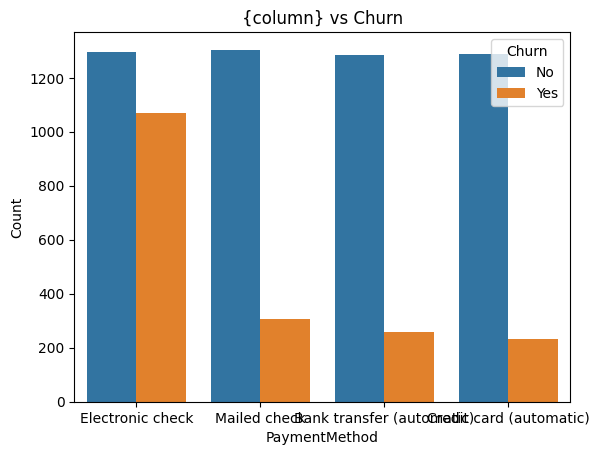

In [21]:
sns.countplot(x=column, hue='Churn', data=pd.concat([x, y], axis=1))
plt.title('{column} vs Churn')
plt.xlabel(column)
plt.ylabel('Count')
plt.show()

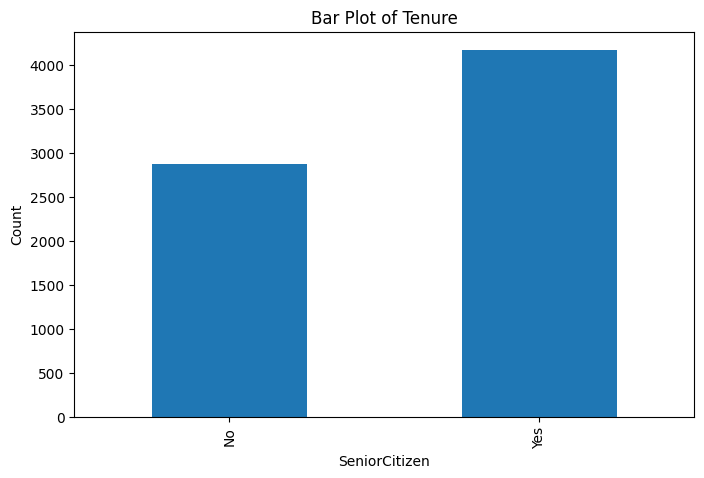

In [10]:
# plt.figure(figsize=(8, 5))
# sns.histplot(df['MonthlyCharges'], bins=10, kde=True)
# plt.title('Distribution of Tenure')
# plt.xlabel('Tenure')
# plt.ylabel('Frequency')
# plt.show()

plt.figure(figsize=(8, 5))
df[column].value_counts().sort_index().plot(kind='bar')
plt.title('Bar Plot of Tenure')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.show()



In [11]:
model = LogisticRegression()
encoder = ce.BinaryEncoder(cols=[column])
xx = encoder.fit_transform(df[column])
model.fit(xx,y)
print("Score: ",model.score(xx,y))
xx.head()

Score:  0.7346301292063041


,PaperlessBilling_0,PaperlessBilling_1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [22]:
import statsmodels.api as sm

# Add a constant (intercept) to the model
yy = df['Churn'].map({'Yes': 1, 'No': 0})  # Convert 'Churn' to binary
# xx = df['SeniorCitizen']
# Add a constant (intercept) to the model
X_const = sm.add_constant(xx)

# Fit the logistic regression model
logit_model = sm.Logit(yy, X_const)
result = logit_model.fit()

# Print the statistical summary
print(result.summary())

         Current function value: 0.559405
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7040
Method:                           MLE   Df Model:                            2
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                 0.03317
Time:                        11:44:05   Log-Likelihood:                -3939.9
converged:                      False   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                 1.947e-59
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7722   6.04e+05  -1.28e-06      1.000   -1.18e+06    1.18e+06
PaperlessBilling_0    -0.8617   6.04e+05 

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Combine the model

In [17]:
# df = df.drop(columns=['customerID','Churn'])
#'Dependents','Partner','PhoneService','OnlineSecurity'
column = ['gender','tenure','SeniorCitizen','MultipleLines','InternetService','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling']
new_df = pd.DataFrame()
for col in column:
#     print(df[col].dtype," = ",np.number)
#     if pd.api.types.is_numeric_dtype(df[col]):
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        new_df = pd.concat([new_df,df[col]],axis=1)
    else:
        encoder = ce.BinaryEncoder(cols=[col])
        x = encoder.fit_transform(df[col])
        new_df = pd.concat([new_df, x], axis=1)
#         one_hot_encoded = pd.get_dummies(df[col], prefix=col)
#         new_df = pd.concat([new_df, one_hot_encoded], axis=1)
#     print(new_df.head())
# new_df = new_df.drop(columns=['gender_1'])
# new_df['tenure_1'] = new_df['tenure']*2
new_df.head()

,gender_0,gender_1,tenure,SeniorCitizen,MultipleLines_0,MultipleLines_1,InternetService_0,InternetService_1,OnlineBackup_0,OnlineBackup_1,TechSupport_0,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1,Contract_0,Contract_1,PaperlessBilling_0,PaperlessBilling_1
0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
1,1,0,34,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0
2,1,0,2,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
3,1,0,45,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0
4,0,1,2,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1


In [18]:
new_df['tenure_1'] = np.sqrt(new_df['tenure'])
# new_df['MonthlyCharges_1'] = np.log(new_df['MonthlyCharges'])
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# new_df['SeniorCitizen_scaled'] = scaler.fit_transform(df[['SeniorCitizen']])
new_df.head()

,gender_0,gender_1,tenure,SeniorCitizen,MultipleLines_0,MultipleLines_1,InternetService_0,InternetService_1,OnlineBackup_0,OnlineBackup_1,...,TechSupport_1,StreamingTV_0,StreamingTV_1,StreamingMovies_0,StreamingMovies_1,Contract_0,Contract_1,PaperlessBilling_0,PaperlessBilling_1,tenure_1
0,0,1,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,1.000000
1,1,0,34,0,1,0,0,1,1,0,...,1,0,1,0,1,1,0,1,0,5.830952
2,1,0,2,0,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,1.414214
3,1,0,45,0,0,1,0,1,1,0,...,0,0,1,0,1,1,0,1,0,6.708204
4,0,1,2,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,1.414214


In [19]:
model.fit(new_df,y)
model.score(new_df,y)
# print(model.coef_)
# print(model.intercept_)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8078943631975011

**Without transform accuracy: .79**